# CS235_FALL-UCR-Jonathan Vasquez
# Python Libraries

## Scipy, Sklearn, Pandas, Numpy, Seaborn, Matplotlib, statsmodels, IPython, Graphviz

## Data Collection

In [43]:
from scipy.stats import randint
from sklearn import metrics
#from sklearn import cross_validation
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import  KNeighborsClassifier
from pprint import pprint

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

#Tree Visualization
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

ds = pd.read_csv(r"C:\Users\sequi\CS235_Fall2023\diabetes_012_health_indicators_BRFSS2015.csv")
ds.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.158742,0.434244,0.431654,0.963750,28.462385,0.445364,0.041390,0.093401,0.761698,0.636696,...,0.950430,0.081931,2.503735,3.160352,4.233822,0.166372,0.438154,8.091501,5.076981,6.104561
std,0.365437,0.495660,0.495309,0.186913,7.201643,0.497008,0.199192,0.290995,0.426047,0.480954,...,0.217057,0.274261,1.069779,7.338189,8.678973,0.372416,0.496163,3.042941,0.985014,2.060430
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Data Cleaning - Duplicates, Missing values, etc

Missing Values: 
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


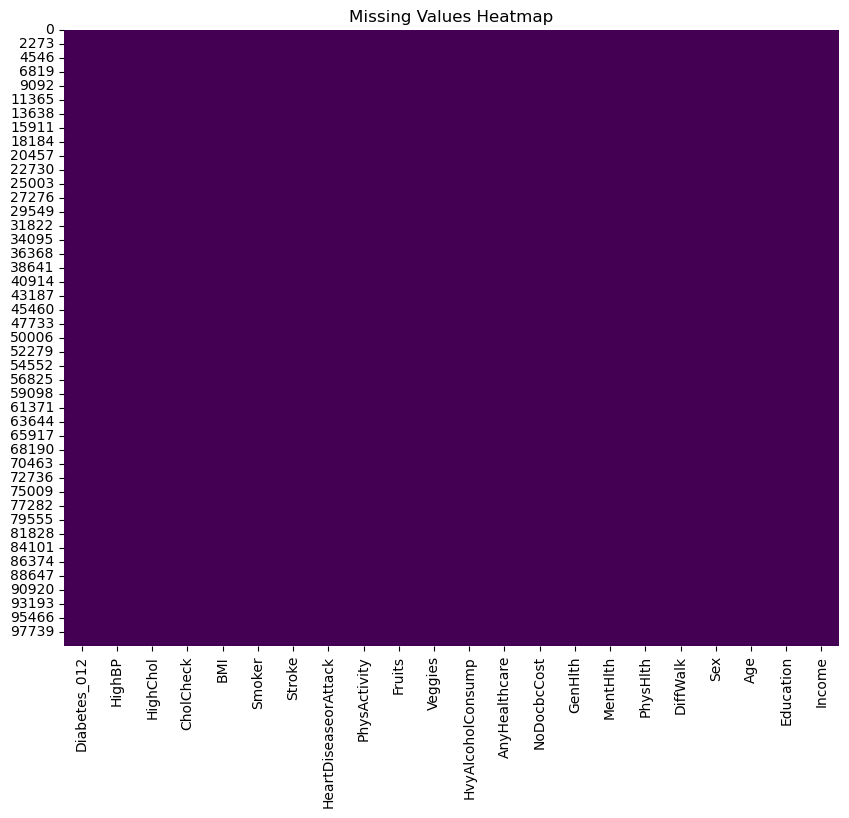

In [3]:
#Let's find the missing values
missing_values = ds.isnull().sum()
print("Missing Values: ")
print(missing_values)

plt.figure(figsize=(10,8))
sns.heatmap(ds.isnull(),cmap='viridis',cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [4]:
#Let's check for any duplicates
repeat = ds[ds.duplicated()]
print("# of duplicates is: ", len(repeat))

#Let's remove the duplicates
new_ds = ds.drop_duplicates()
new_ds

# of duplicates is:  6085


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0,0,1,1,28,0,0,0,1,1,...,1,0,2,0,3,0,1,9,6,8
99995,0,1,1,1,19,1,0,0,1,0,...,1,0,3,0,4,0,0,11,5,5
99996,0,1,1,1,25,1,0,1,1,1,...,1,0,2,0,10,1,0,13,4,5
99997,0,0,1,1,29,1,0,0,1,0,...,1,0,2,0,0,0,0,8,4,8


# Feature Engineering

## Data Manipulation: Normalization and Scalization

In [5]:
normalized_ds = preprocessing.normalize(new_ds)
columns_names = ['Diabetes_012','HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity',
                'Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PHysHlth','DiffWalk',
                'Sex','Age','Education','Income']

scaled_ds = pd.DataFrame(normalized_ds,columns=columns_names)
print(scaled_ds)

       Diabetes_012    HighBP  HighChol  CholCheck       BMI    Smoker  \
0               0.0  0.020911  0.020911   0.020911  0.836425  0.020911   
1               0.0  0.000000  0.000000   0.000000  0.929760  0.037190   
2               0.0  0.018976  0.018976   0.018976  0.531337  0.000000   
3               0.0  0.033241  0.000000   0.033241  0.897510  0.000000   
4               0.0  0.036322  0.036322   0.036322  0.871719  0.000000   
...             ...       ...       ...        ...       ...       ...   
93909           0.0  0.000000  0.031863   0.031863  0.892154  0.000000   
93910           0.0  0.042145  0.042145   0.042145  0.800755  0.042145   
93911           0.0  0.032461  0.032461   0.032461  0.811534  0.032461   
93912           0.0  0.000000  0.031702   0.031702  0.919362  0.031702   
93913           0.0  0.036637  0.036637   0.036637  0.879292  0.036637   

       Stroke  HeartDiseaseorAttack  PhysActivity    Fruits  ...  \
0         0.0              0.000000      0.

## Pearson Corrleation - Heat Map - Feature Correlation

<Axes: >

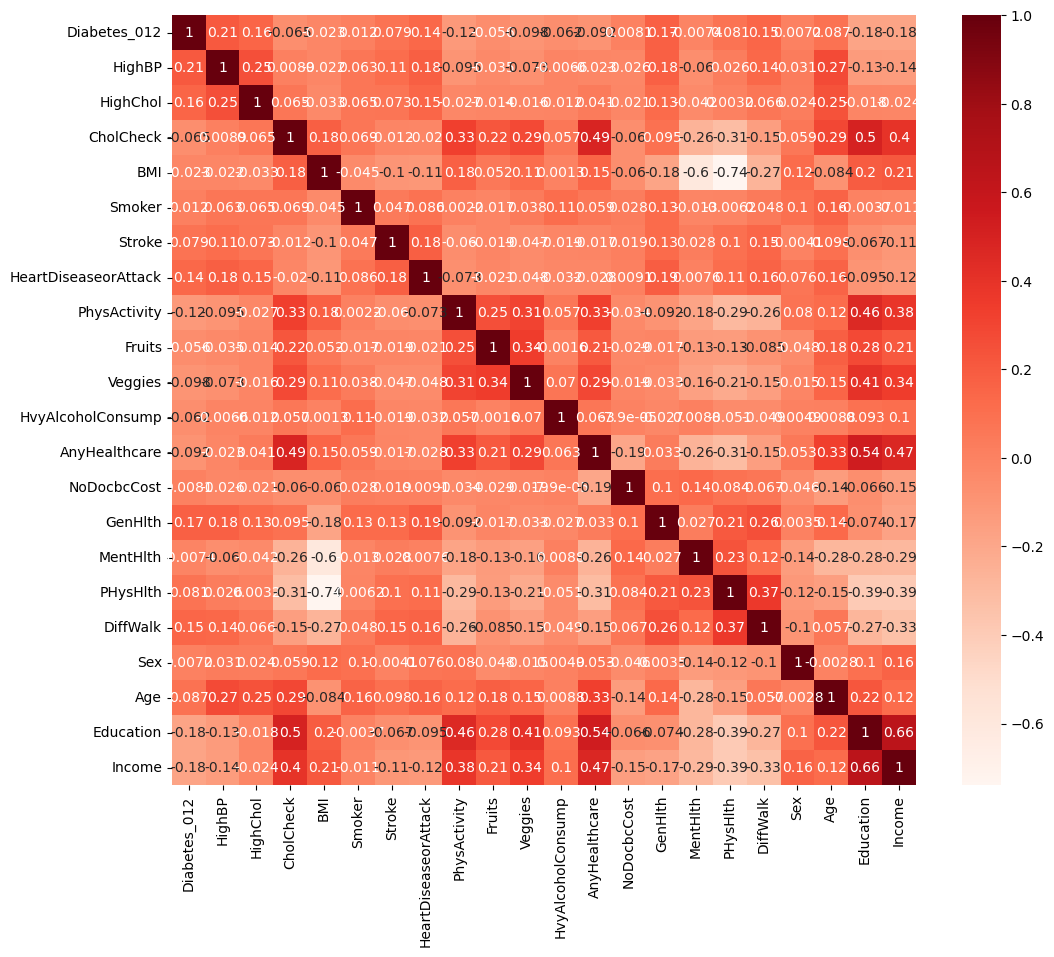

In [6]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor= scaled_ds.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [7]:
#correlation with output variable
cor_target = abs(cor['Diabetes_012'])

#Let's select the features with most correlation
relevant_features = cor_target[cor_target>0.17]
relevant_features

Diabetes_012    1.000000
HighBP          0.211770
GenHlth         0.173632
Education       0.176297
Income          0.180899
Name: Diabetes_012, dtype: float64

In [8]:
#let's remove columns
columns_to_keep= ['Diabetes_012','HighBP','GenHlth','Education','Income']
cleaned_ds = ds[columns_to_keep]

## Split the Data

In [9]:
#Splitting the data
X = cleaned_ds.drop('Diabetes_012', axis=1)
y = cleaned_ds['Diabetes_012']

y

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99995    0
99996    0
99997    0
99998    0
Name: Diabetes_012, Length: 99999, dtype: int64

## Cross Validation (Logistic Regression)

Cross-validation score:  0.8406984078407842


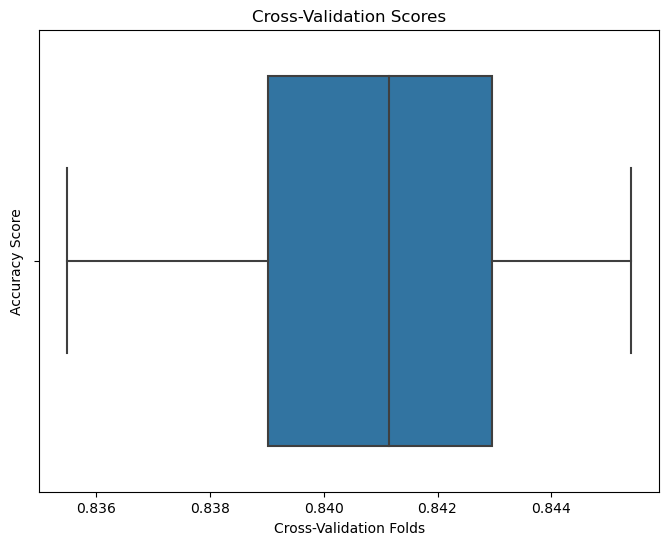

In [10]:
#Let's do some Cross Validation (Logistic Regression)
model = LogisticRegression()

#Let's do a 10-fold cross-validation
times = cross_val_score(model,X,y, cv=10)

#Let's print the average score
print("Cross-validation score: ", times.mean())

plt.figure(figsize=(8,6))
sns.boxplot(x=times)
plt.title("Cross-Validation Scores")
plt.xlabel("Cross-Validation Folds")
plt.ylabel("Accuracy Score")
plt.show()

## Train - Test Split Data

In [11]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

y_train

56143    0
92124    0
28974    0
83682    0
7361     1
        ..
44423    0
37281    0
78189    0
53427    0
10994    0
Name: Diabetes_012, Length: 79999, dtype: int64

In [12]:
#Shapes of my variables
X.shape

(99999, 4)

# Modeling

## Hyperparameter Tuning

In [88]:
#Hyperparameter Tuning
param_dist = {'n_estimators': randint(50,500),
             'max_depth': randint(1,10),
             'max_leaf_nodes':[None],
             'max_features':["sqrt","log2",None]}

#create a random forest classifier
rf=RandomForestClassifier()

#Let's find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                param_distributions = param_dist,
                                n_iter=5,
                                cv=5)

#it will not try every single combination

#fit the random search object to the data
rand_search.fit(X_train, y_train)
print(rand_search.best_estimator_)


RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=348)


## Random Forest Model 

In [99]:
rf_classifier = RandomForestClassifier(n_estimators=348,
                                      max_depth=5,max_features="log2")
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=348)

In [100]:
#Making a classifier prediction and assigning values
y_pred = rf_classifier.predict(X_test)

In [68]:
print("the number of parameters used in RF:\n ")
pprint(rf_classifier.get_params())

the number of parameters used in RF:
 
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': 9,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 349,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}


## Random Forest Model Accuracy

Accuracy:  0.8413

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91     16841
           1       0.41      0.01      0.02      3159

    accuracy                           0.84     20000
   macro avg       0.63      0.50      0.47     20000
weighted avg       0.77      0.84      0.77     20000


Confusion Matrix: 
 [[16793    48]
 [ 3126    33]]


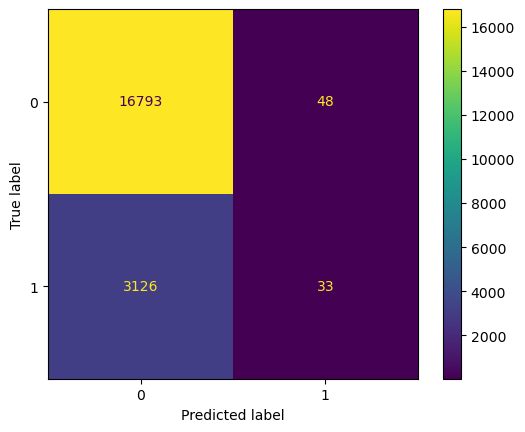

In [101]:
#Evaluation of the Model
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("\nClassification Report: \n", classification_report(y_test,y_pred))

#Confussion Matrix
print("\nConfusion Matrix: \n", confusion_matrix(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

## Random Forest - Mean Square Error (MSE) & R^2 Score

In [102]:
#Let's use the Mean Square Error(MSE)
mse_rf=np.square(np.subtract(y_test, y_pred)).mean()
#Let's get the R^2
r_square=r2_score(y_test,y_pred)
print("The Mean Square Error values is: ", mse_rf)
print("The R square value is: ", r_square)

The Mean Square Error values is:  0.1587
The R square value is:  -0.19321695633474412


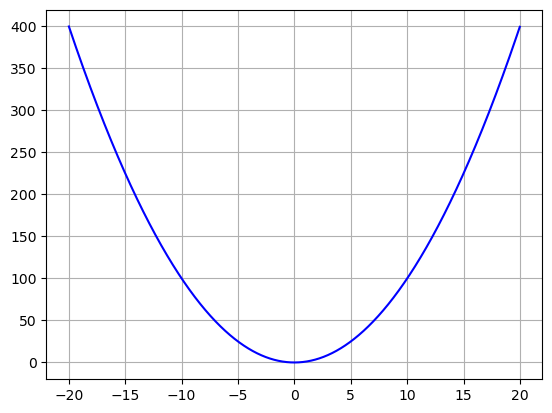

In [81]:
#Plotting MSE

#MSE loss function
def mse_loss(y_pred, y):
    squared_error = (y_pred - y)**2
    sum_squared_error = np.sum(squared_error)
    loss = sum_square_error / y_true.size
    return loss
#plotting
x_vals = np.arange(-20,20,0.01)
y_vals = np.square(x_vals)

plt.plot(x_vals, y_vals,"blue")
plt.grid(True, which="major")
plt.show()

## Support Vector Machine (SVM)

In [23]:
#L'ets use SVM
#let's create a Support Vector Machine classifier
classifier_svm = SVC(kernel='linear') 

#train the model using the training sets
classifier_svm.fit(X_train, y_train)

#predict the response for test dataset
y_pred_class = classifier_svm.predict(X_test)

SVM Accuracy:  0.84205

Confusion Matrix: 
 [[16841     0]
 [ 3159     0]]


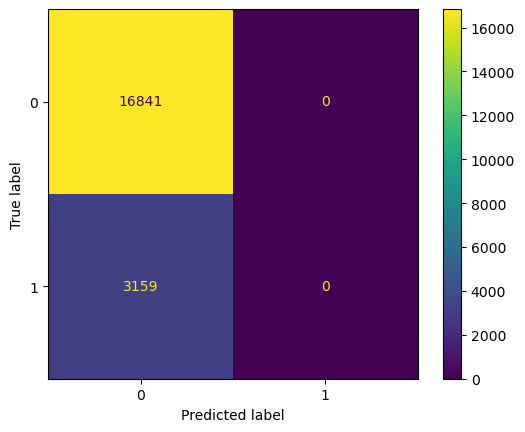

In [29]:
#Let's evaluate the model with SVM
print("SVM Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
#Confussion Matrix
print("\nConfusion Matrix: \n", confusion_matrix(y_test,y_pred_class))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_class)).plot()

## SVM - Mean Square Error (MSE) & R^2 Score

In [32]:
#Let's use the Mean Square Error(MSE)
mse_svm=np.square(np.subtract(y_test, y_pred_class)).mean()
#Let's get the R^2
r_square_svm=r2_score(y_test,y_pred_class)
print("The Mean Square Error values is: ", mse_svm)
print("The R square value is: ", r_square)

The Mean Square Error values is:  0.15795
The R square value is:  -0.20562280370684438


## Vizualizing The Random Forest Tree

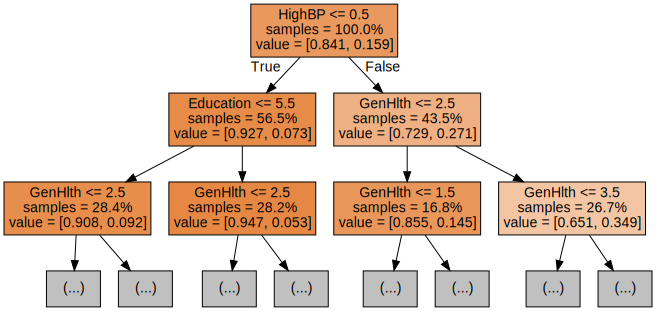

In [103]:
#Visualizing the results

for i in range(1):
    tree = rf_classifier.estimators_[i]
    dot_data = export_graphviz(tree, feature_names=X_train.columns,
                              filled=True,
                              max_depth=2,
                              impurity=False,
                              proportion=True)
    graph=graphviz.Source(dot_data)
    display(graph)